In [ ]:
import nltk 
import numpy as np
import pandas as pd
import spacy
import re
import string

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd '/content/gdrive/My Drive/nlp_data/'
%ls -l .

/content/gdrive/My Drive/nlp_data
total 1213704
-rw------- 1 root root 1037962819 Aug 27  2014 glove.6B.300d.txt
-rw------- 1 root root  171350079 Aug  4  2014 glove.6B.50d.txt
-rw------- 1 root root     144014 Nov 18 18:01 sample_submission.csv
-rw------- 1 root root     132013 Dec  1 21:13 submission.csv
-rw------- 1 root root    6780801 Nov 18 18:02 test.parquet
-rw------- 1 root root   26461243 Nov 18 18:03 train.parquet


In [ ]:
df = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

### **EDA**

In [ ]:
display(df.head())
df.info()

,Body,Tags,Title,target
Id,,,,
34862324,Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...,<java><algorithm><graph-algorithm>,I am implementing a Minimum Spanning Forrest a...,2
47303682,"While converting the data frame to HTML, Date ...",<html><r><dataframe>,"R Studio: Date is getting converted to number,...",2
46431243,"<p>This should be an easy one, but somehow I c...",<python><pandas><dataframe><pandas-groupby>,Pandas - dataframe groupby - how to get sum of...,0
45306324,<p>Let say I have a component in Angular 2 tha...,<angular><typescript><rxjs>,Casting results from Observable.forkJoin to th...,0
49479547,<p>I'm setting a var using \n<code>set TEST_VA...,<c><windows><batch-file>,Environment variable set in batch file cannot ...,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48000 entries, 34862324 to 40415937
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    48000 non-null  object
 1   Tags    48000 non-null  object
 2   Title   48000 non-null  object
 3   target  48000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
df.shape


(48000, 4)

The train dataset contains 48000 rows and 4 columns.

In [ ]:
df.isnull().sum()


Body      0
Tags      0
Title     0
target    0
dtype: int64

The train dataset doesn't contain null values.

In [ ]:
df.columns

Index(['Body', 'Tags', 'Title', 'target'], dtype='object')

In [ ]:
df['combined_text'] = df['Body'] + ' ' + df['Title'] + ' ' + df['Tags']


 Converting text to lowercase:

In [ ]:
df['cleaned']=df['Title'].apply(lambda x: x.lower())

Remove digits and words containing digits

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

Remove Punctuations

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have",
                     "aint": "are not","arent": "are not",
                     "cant": "cannot","cantve": "cannot have","couldve": "could have","couldnt": "could not",
                     "couldntve": "could not have", "didnt": "did not","doesnt": "does not",
                     "dont": "do not","hadnt": "had not","hadntve": "had not have",
                     "hasnt": "has not","havent": "have not","hed": "he would",
                     "hedve": "he would have","hell": "he will", "hellve": "he will have",
                     "howd": "how did","howdy": "how do you","howll": "how will",
                     "Id": "I would", "Idve": "I would have","Ill": "I will",
                     "Illve": "I will have","Im": "I am","Ive": "I have", "isnt": "is not",
                     "itd": "it would","itdve": "it would have","itll": "it will",
                     "itllve": "it will have", "let's": "let us","ma'am": "madam",
                     "maynt": "may not","mightve": "might have","mightnt": "might not", 
                     "mightntve": "might not have","mustve": "must have","mustnt": "must not",
                     "mustntve": "must not have", "neednt": "need not",
                     "needntve": "need not have","oughtnt": "ought not",
                     "oughtntve": "ought not have","shant": "shall not","shant": "shall not",
                     "shantve": "shall not have","shed": "she would","shedve": "she would have",
                     "shell": "she will", "shellve": "she will have","shouldve": "should have",
                     "shouldnt": "should not", "shouldntve": "should not have","sove": "so have",
                     "thatd": "that would","thatdve": "that would have", "thered": "there would",
                     "theredve": "there would have", "theyd": "they would",
                     "theydve": "they would have","theyll": "they will",
                     "theyllve": "they will have", "theyre": "they are","theyve": "they have",
                     "tove": "to have","wasnt": "was not","wed": "we would",
                     "wedve": "we would have","well": "we will","wellve": "we will have",
                     "were": "we are","weve": "we have", "werent": "were not","whatll": "what will",
                     "whatllve": "what will have","whatre": "what are", "whatve": "what have",
                     "whenve": "when have","whered": "where did", "whereve": "where have",
                     "wholl": "who will","whollve": "who will have","whove": "who have",
                     "whyve": "why have","willve": "will have","wont": "will not",
                     "wontve": "will not have", "wouldve": "would have","wouldnt": "would not",
                     "wouldntve": "would not have","yall": "you all", "yalld": "you all would",
                     "yalldve": "you all would have","yallre": "you all are",
                     "yallve": "you all have", "youd": "you would","youdve": "you would have",
                     "youll": "you will","youllve": "you will have", "youre": "you are",
                     "youve": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['cleaned']=df['cleaned'].apply(lambda x:expand_contractions(x))

Stopwords Removal


In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

from PIL import Image
import requests

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS)

Tokenization

In [ ]:
for val in df['cleaned']: 
    val = str(val) 
    tokens = val.split()  
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "

Word Cloud

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords,  
                min_font_size = 10).generate(comment_words)

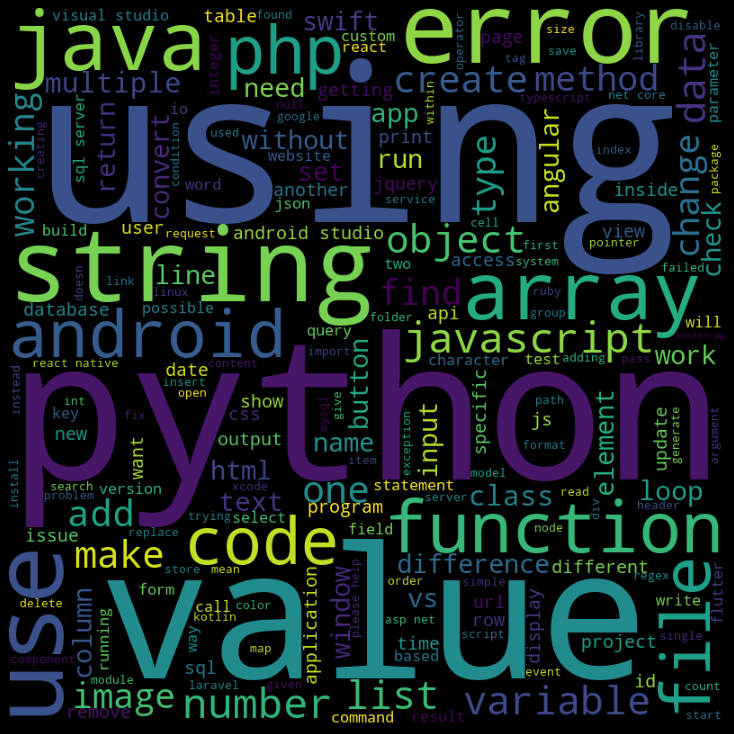

In [ ]:
plt.figure(figsize = (10, 10), facecolor = 'black', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()

Popular words

In [ ]:
from wordcloud import STOPWORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
stopwords = set(STOPWORDS)
lemmatizer = WordNetLemmatizer()

df['cleaned'] = [text.split() for text in df['cleaned']]
df['cleaned'] = [[lemmatizer.lemmatize(word) for word in text if word not in stopwords] for text in df['cleaned']]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def calc_popular_words(data):
    popular_words = {}

    for text in data:
        for word in text:
            if word in popular_words.keys():
                popular_words[str(word)] += 1
            else:
                popular_words[str(word)] = 1

    return popular_words

def sort_by_value(dct):
    return dict(sorted(dct.items(), key=lambda item: item[1], reverse=True))

In [ ]:
popular_words = calc_popular_words(df['cleaned'])
print(popular_words)

{'implementing': 39, 'minimum': 46, 'spanning': 2, 'forrest': 1, 'algorihm': 2, 'java': 2048, 'stuck': 68, 'write': 442, 'loop': 823, 'studio': 859, 'date': 797, 'getting': 613, 'converted': 25, 'number': 1373, 'making': 101, 'html': 867, 'datafrane': 1, 'panda': 275, 'dataframe': 222, 'groupby': 21, 'sum': 223, 'multiple': 897, 'column': 886, 'casting': 23, 'result': 410, 'observable': 76, 'forkjoin': 4, 'respective': 5, 'type': 1032, 'angular': 728, 'environment': 121, 'variable': 1248, 'set': 712, 'batch': 120, 'file': 2613, 'accessed': 13, 'c': 3276, 'code': 1938, 'compiled': 32, 'scrolled': 5, 'uicollectionview': 12, 'typescript': 303, 'directive': 38, 'error': 2611, 't': 1494, 'install': 299, 'staruml': 1, 'ubuntu': 117, 'path': 247, 'folder': 228, 'created': 127, 'uwp': 22, 'turn': 68, 'gps': 15, 'using': 3300, 'button': 680, 'without': 703, 'setting': 167, 'menu': 126, 'compiler': 90, 'doesn': 369, 'let': 63, 'use': 1687, 'switch': 133, 'select': 419, 'locator': 4, 'span': 34, 

In [ ]:
print(sort_by_value(popular_words))

{'using': 3300, 'c': 3276, 'python': 2649, 'file': 2613, 'error': 2611, 'string': 2543, 'value': 2449, 'array': 2379, 'android': 2080, 'java': 2048, 'function': 1940, 'code': 1938, 'use': 1687, 'data': 1639, 'php': 1593, 'list': 1582, 't': 1494, 'javascript': 1427, 'object': 1374, 'number': 1373, 'variable': 1248, 'class': 1169, 'sql': 1102, 'type': 1032, 'text': 1015, 'create': 1014, 'app': 1006, 's': 994, 'one': 947, 'make': 929, 'method': 929, 'find': 906, 'multiple': 897, 'add': 896, 'column': 886, 'image': 881, 'react': 870, 'html': 867, 'working': 861, 'studio': 859, 'json': 852, 'change': 847, 'two': 845, 'table': 844, 'convert': 834, 'loop': 823, 'element': 817, 'name': 812, 'time': 799, 'help': 798, 'date': 797, 'j': 779, 'work': 772, 'line': 768, 'server': 741, 'angular': 728, 'input': 722, 'return': 715, 'set': 712, 'way': 711, 'without': 703, 'need': 685, 'another': 683, 'button': 680, 'database': 666, 'swift': 664, 'user': 664, 'run': 641, 'new': 635, 'net': 632, 'differen

In [ ]:
# count of words in text
count_words = sum(popular_words.values())
print(count_words)

278946


In [ ]:
# count of unique words in text
count_unique_words = len(popular_words)
print(count_unique_words)

17756


In [ ]:
# count of characters without spaces
sum_character = sum([sum([len(word) for word in text]) for text in df['cleaned']])
print(sum_character) 

1636879


In [ ]:
# avg count of words by text
avg_words = round(sum([sum([len(word) for word in text]) for text in df['cleaned']]) / df['cleaned'].shape[0])
print(avg_words)

34


### **BOW AND TF-IDF**

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split


In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])
train_df.shape, val_df.shape


((38400, 6), (9600, 6))

In [ ]:
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(train_df['combined_text'])
tfidf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)

## **Naive Bayes and Random Forest**

In [ ]:
nb_clf = MultinomialNB().fit(X_train_tfidf, train_df['target'])

In [ ]:
rf_clf = RandomForestClassifier().fit(X_train_tfidf, train_df['target'])

In [ ]:
X_val_counts = count_vectorizer.transform(val_df['combined_text'])
X_val_tfidf = tfidf_transformer.transform(X_val_counts)

In [ ]:
predict_nb = nb_clf.predict_proba(X_val_tfidf)
predict_nb, predict_nb.shape

(array([[0.06018678, 0.26681701, 0.67299621],
        [0.24902098, 0.39261563, 0.35836339],
        [0.7418896 , 0.15711117, 0.10099924],
        ...,
        [0.22512083, 0.57518437, 0.19969479],
        [0.13513677, 0.32576783, 0.5390954 ],
        [0.85285592, 0.11378355, 0.03336053]]), (9600, 3))

In [ ]:
predict_rf = rf_clf.predict_proba(X_val_tfidf)
predict_rf, predict_rf.shape

(array([[0.11, 0.35, 0.54],
        [0.06, 0.29, 0.65],
        [0.43, 0.25, 0.32],
        ...,
        [0.18, 0.39, 0.43],
        [0.12, 0.45, 0.43],
        [0.55, 0.25, 0.2 ]]), (9600, 3))

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
from sklearn.preprocessing import LabelBinarizer
target_transformer = LabelBinarizer().fit(y=train_df['target'])

def transform_label(label: str):
    return target_transformer.transform([label])[0]

In [ ]:
y_true = np.array(val_df['target'].apply(transform_label).tolist())

In [ ]:
def collect_stats_for_curves_plot(y, scores, n_classes):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y[:, i], scores[:, i])
        average_precision[i] = average_precision_score(y[:, i], scores[:, i])

    return precision, recall, average_precision

In [ ]:
ap_score = average_precision_score(y_true, predict_rf, average='macro')
print(f"Macro AP score: {ap_score}")
ap_score = average_precision_score(y_true, predict_rf, average='micro')
print(f"Micro AP score: {ap_score}")
ap_score = average_precision_score(y_true, predict_rf, average='weighted')
print(f"Weighted AP score: {ap_score}")

precision, recall, average_precision = collect_stats_for_curves_plot(y_true, predict_rf, 3)
precision["micro"], recall["micro"], thresholds = precision_recall_curve(y_true.ravel(), predict_rf.ravel())
average_precision["micro"] = average_precision_score(y_true, predict_rf, average="micro")
fscore = (2 * precision["micro"] * recall["micro"]) / (precision["micro"] + recall["micro"])
index = np.argmax(fscore)

thresholdOpt = round(thresholds[index], ndigits=4)
fscoreOpt = round(fscore[index], ndigits=4)
recallOpt = round(recall["micro"][index], ndigits=4)
precisionOpt = round(precision["micro"][index], ndigits=4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

Macro AP score: 0.8606880530152523
Micro AP score: 0.8655281288409079
Weighted AP score: 0.8606880530152523
Best Threshold: 0.38 with F-Score: 0.7844
Recall: 0.8305, Precision: 0.7431


In [ ]:
ap_score = average_precision_score(y_true, predict_nb, average='macro')
print(f"Macro AP score: {ap_score}")
ap_score = average_precision_score(y_true, predict_nb, average='micro')
print(f"Micro AP score: {ap_score}")
ap_score = average_precision_score(y_true, predict_nb, average='weighted')
print(f"Weighted AP score: {ap_score}")

precision, recall, average_precision = collect_stats_for_curves_plot(y_true, predict_nb, 3)
precision["micro"], recall["micro"], thresholds = precision_recall_curve(y_true.ravel(), predict_nb.ravel())
average_precision["micro"] = average_precision_score(y_true, predict_nb, average="micro")
fscore = (2 * precision["micro"] * recall["micro"]) / (precision["micro"] + recall["micro"])
index = np.argmax(fscore)

thresholdOpt = round(thresholds[index], ndigits=4)
fscoreOpt = round(fscore[index], ndigits=4)
recallOpt = round(recall["micro"][index], ndigits=4)
precisionOpt = round(precision["micro"][index], ndigits=4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

Macro AP score: 0.8053600164908743
Micro AP score: 0.7835515963289509
Weighted AP score: 0.8053600164908744
Best Threshold: 0.3567 with F-Score: 0.7174
Recall: 0.7988, Precision: 0.6511


## **GloVe**

In [ ]:
from nltk import word_tokenize
from gensim.models import word2vec

import numpy as np
np.random.seed(0)

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
target = train_df['target']
data = train_df['combined_text'].map(word_tokenize).values
total_vocabulary = set(word for headline in data for word in headline)
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [ ]:
class W2vVectorizer(object):

    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])

    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression(max_iter=1000))])

In [ ]:
models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]

In [ ]:
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model, in models]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [ ]:
scores

[('Random Forest', 0.7166927083333333),
 ('Support Vector Machine', 0.7151302083333333),
 ('Logistic Regression', 0.6997135416666667)]

## RNN

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [ ]:
y = pd.get_dummies(target).values

In [ ]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(train_df['combined_text']))
list_tokenized_headlines = tokenizer.texts_to_sequences(train_df['combined_text'])
X_t = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 50)                1300      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                        

In [ ]:
model.fit(X_t, y, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1080/1080 [==============================] - 33s 28ms/step - loss: 0.4921 - accuracy: 0.7464 - val_loss: 0.2415 - val_accuracy: 0.9078
Epoch 2/3
1080/1080 [==============================] - 29s 27ms/step - loss: 0.2661 - accuracy: 0.9011 - val_loss: 0.2168 - val_accuracy: 0.9143
Epoch 3/3
1080/1080 [==============================] - 30s 28ms/step - loss: 0.1898 - accuracy: 0.9356 - val_loss: 0.2293 - val_accuracy: 0.9083


### **Наилучший результат показала рекуррентная нейронная сеть LSTM - нейронная сеть с долгой краткосрочной памятью.**

# Test

In [ ]:
df_test['test_combined_text'] = df_test['Body'] + ' ' + df_test['Title'] + ' ' + ['Tags']

In [ ]:
list_tokenized_headlines = tokenizer.texts_to_sequences(df_test['test_combined_text'])
X_t = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

In [ ]:
m = model.predict(X_t)

In [ ]:
n = np.argmax(m, axis=1)

In [ ]:
df = pd.DataFrame({'Id': df_test.index, 'Predicted': n})
df.to_csv('submission.csv', index=False)
